In [1]:
import gym
#from robot_env.cartpole import Cartpole
import numpy as np
import matplotlib.pyplot as plt
import copy 
import statistics as stats

In [2]:
NUM_EPISODES = 2000
LEARNING_RATE = 0.00001
GAMMA = 0.99

# Create gym and seed numpy
env = gym.make('CartPole-v1')
nA = env.action_space.n
np.random.seed(1)

# Init weight
w = np.random.rand(4, 2)

# Keep stats for final print of graph
episode_rewards = []

In [3]:
# Our policy that maps state to action parameterized by w
def policy(state,w):
	z = state.dot(w)
	exp = np.exp(z)
	return exp/np.sum(exp)

# Vectorized softmax Jacobian
def softmax_grad(softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

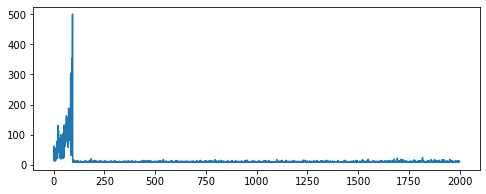

Mean reward:  13.9065
Std Deviation:  23.893455303768366
Variance:  0.2854486031765883


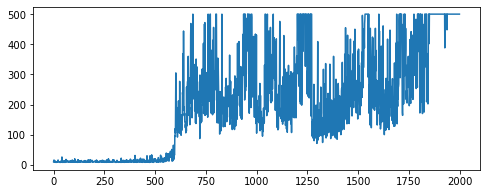

Mean reward:  203.6315
Std Deviation:  167.94005370539003
Variance:  14.101930819284643


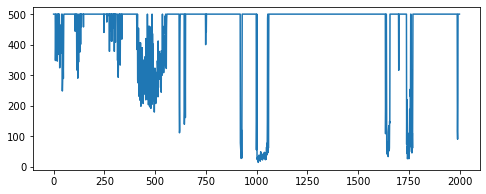

Mean reward:  456.6365
Std Deviation:  113.47534399417918
Variance:  6.438326847298649


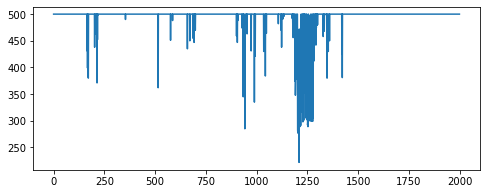

Mean reward:  493.533
Std Deviation:  29.609834213333084
Variance:  0.43837114107053526


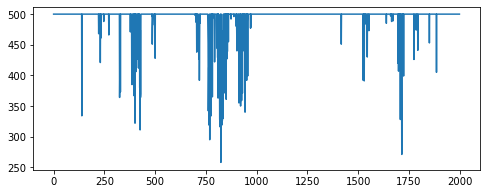

Mean reward:  494.0315
Std Deviation:  25.499855471443993
Variance:  0.3251213145322661


In [4]:
l_rate = [0.0002,0.0004,0.0006,0.0008,0.001]
mean_rewards = []
mean_stddevs = []
mean_variances = []
for l in l_rate:
    LEARNING_RATE = l

    # Init weight
    #w = np.random.rand(4, 2)

    # Keep stats for final print of graph
    episode_rewards = []

# Main loop 
# Make sure you update your weights AFTER each episode
    for e in range(NUM_EPISODES):
        state = env.reset()[None,:]

        grads = []	
        rewards = []

        # Keep track of game score to print
        score = 0

        while True:

            # Uncomment to see your model train in real time (slower)
            #if (e%499==0):
                #env.render()
            #env.render()

            # Sample from policy and take action in environment
            probs = policy(state,w)
            action = np.random.choice(nA,p=probs[0])
            next_state,reward,done,_ = env.step(action)
            next_state = next_state[None,:]

            # Compute gradient and save with reward in memory for our weight updates
            dsoftmax = softmax_grad(probs)[action,:]
            dlog = dsoftmax / probs[0,action]
            grad = state.T.dot(dlog[None,:])

            grads.append(grad)
            rewards.append(reward)		

            score+=reward

            # Dont forget to update your old state to the new state
            state = next_state

            if done:
                break

        # Weight update
        if(score < 350 or score > 450):
            for i in range(len(grads)):
                w += (LEARNING_RATE + 0.001) * grads[i] * sum([ r * (GAMMA ** r) for t,r in enumerate(rewards[i:])])
        else:
            for i in range(len(grads)):
                w += LEARNING_RATE * grads[i] * sum([ r * (GAMMA ** r) for t,r in enumerate(rewards[i:])])
        
        # Append for logging and print
        episode_rewards.append(score) 
        print("EP: " + str(e) + " Score: " + str(score), end="\r", flush=False)
        
    plt.figure(figsize=(8, 3))    
    plt.plot(np.arange(NUM_EPISODES),episode_rewards)
    plt.show()
    print("Mean reward: ",stats.mean(episode_rewards))
    mean_rewards.append(stats.mean(episode_rewards))
    print("Std Deviation: ",stats.stdev(episode_rewards))
    mean_stddevs.append(stats.stdev(episode_rewards))
    print("Variance: ",stats.variance(episode_rewards)/NUM_EPISODES)
    mean_variances.append(stats.variance(episode_rewards)/NUM_EPISODES)

env.close()
        
        

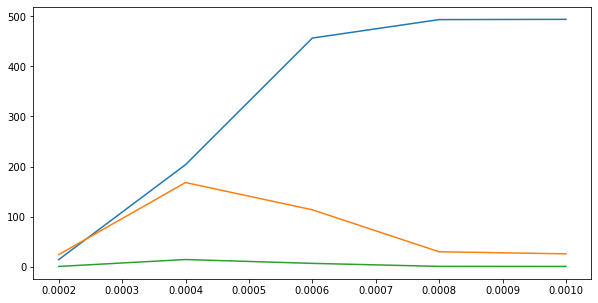

In [5]:
plt.figure(figsize=(10, 5))    
plt.plot(l_rate,mean_rewards)
plt.plot(l_rate,mean_stddevs)
plt.plot(l_rate,mean_variances)
plt.show()
